TotRmag Normal Fit -21.391494750976562, 1.056513786315918
TotRmag Gamma fit : 34.07612063236854 -27.479528481494917 0.17862630918533617
TotRmag Johnson fit : -0.5241155807601983 1.659188484469038 -21.91827788537714 1.3657450090828793
TotRmag BoxCox lamda 4.25768875262945
TotRmag Normal fit : 110069.0078125 21927.10546875


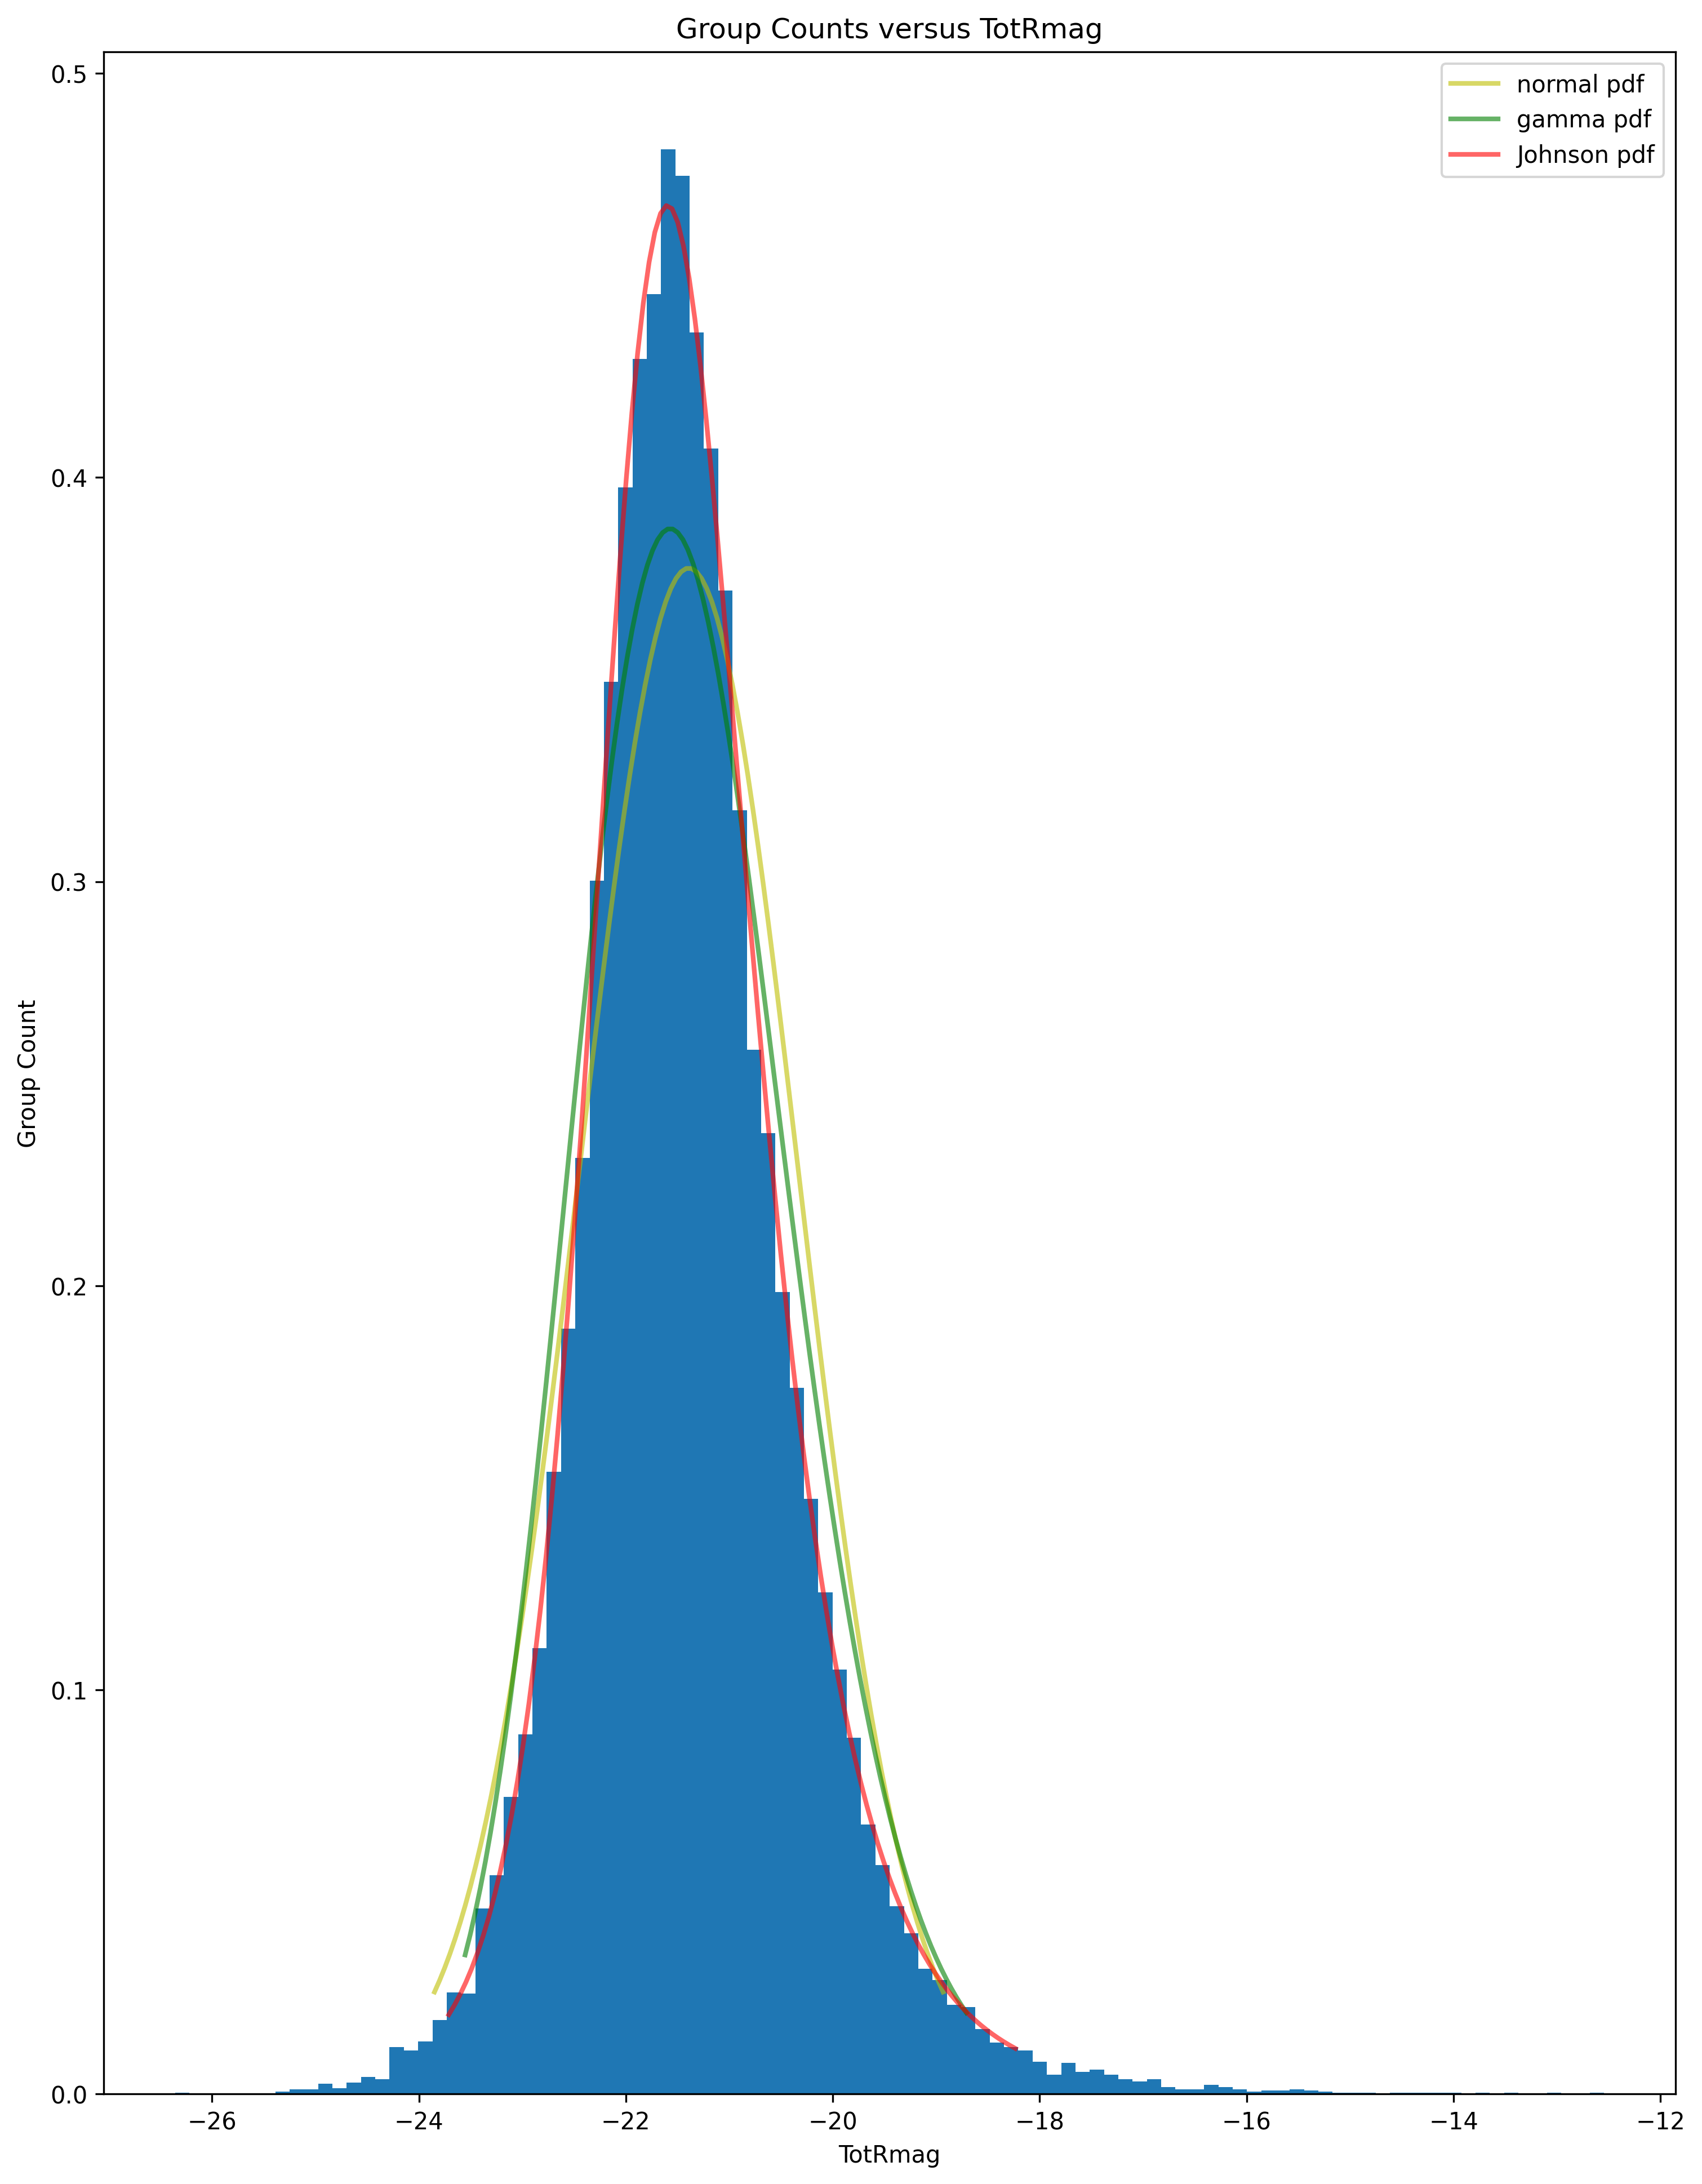

TotFluxProxy Normal Fit 24.569398880004883, 1.3100111484527588
TotFluxProxy Gamma fit : 148.97342776153056 7.930866750000032 0.1115728716494119
TotFluxProxy Johnson fit : 0.158674702303333 2.1545422877828604 24.777121701773964 2.5143948804179557


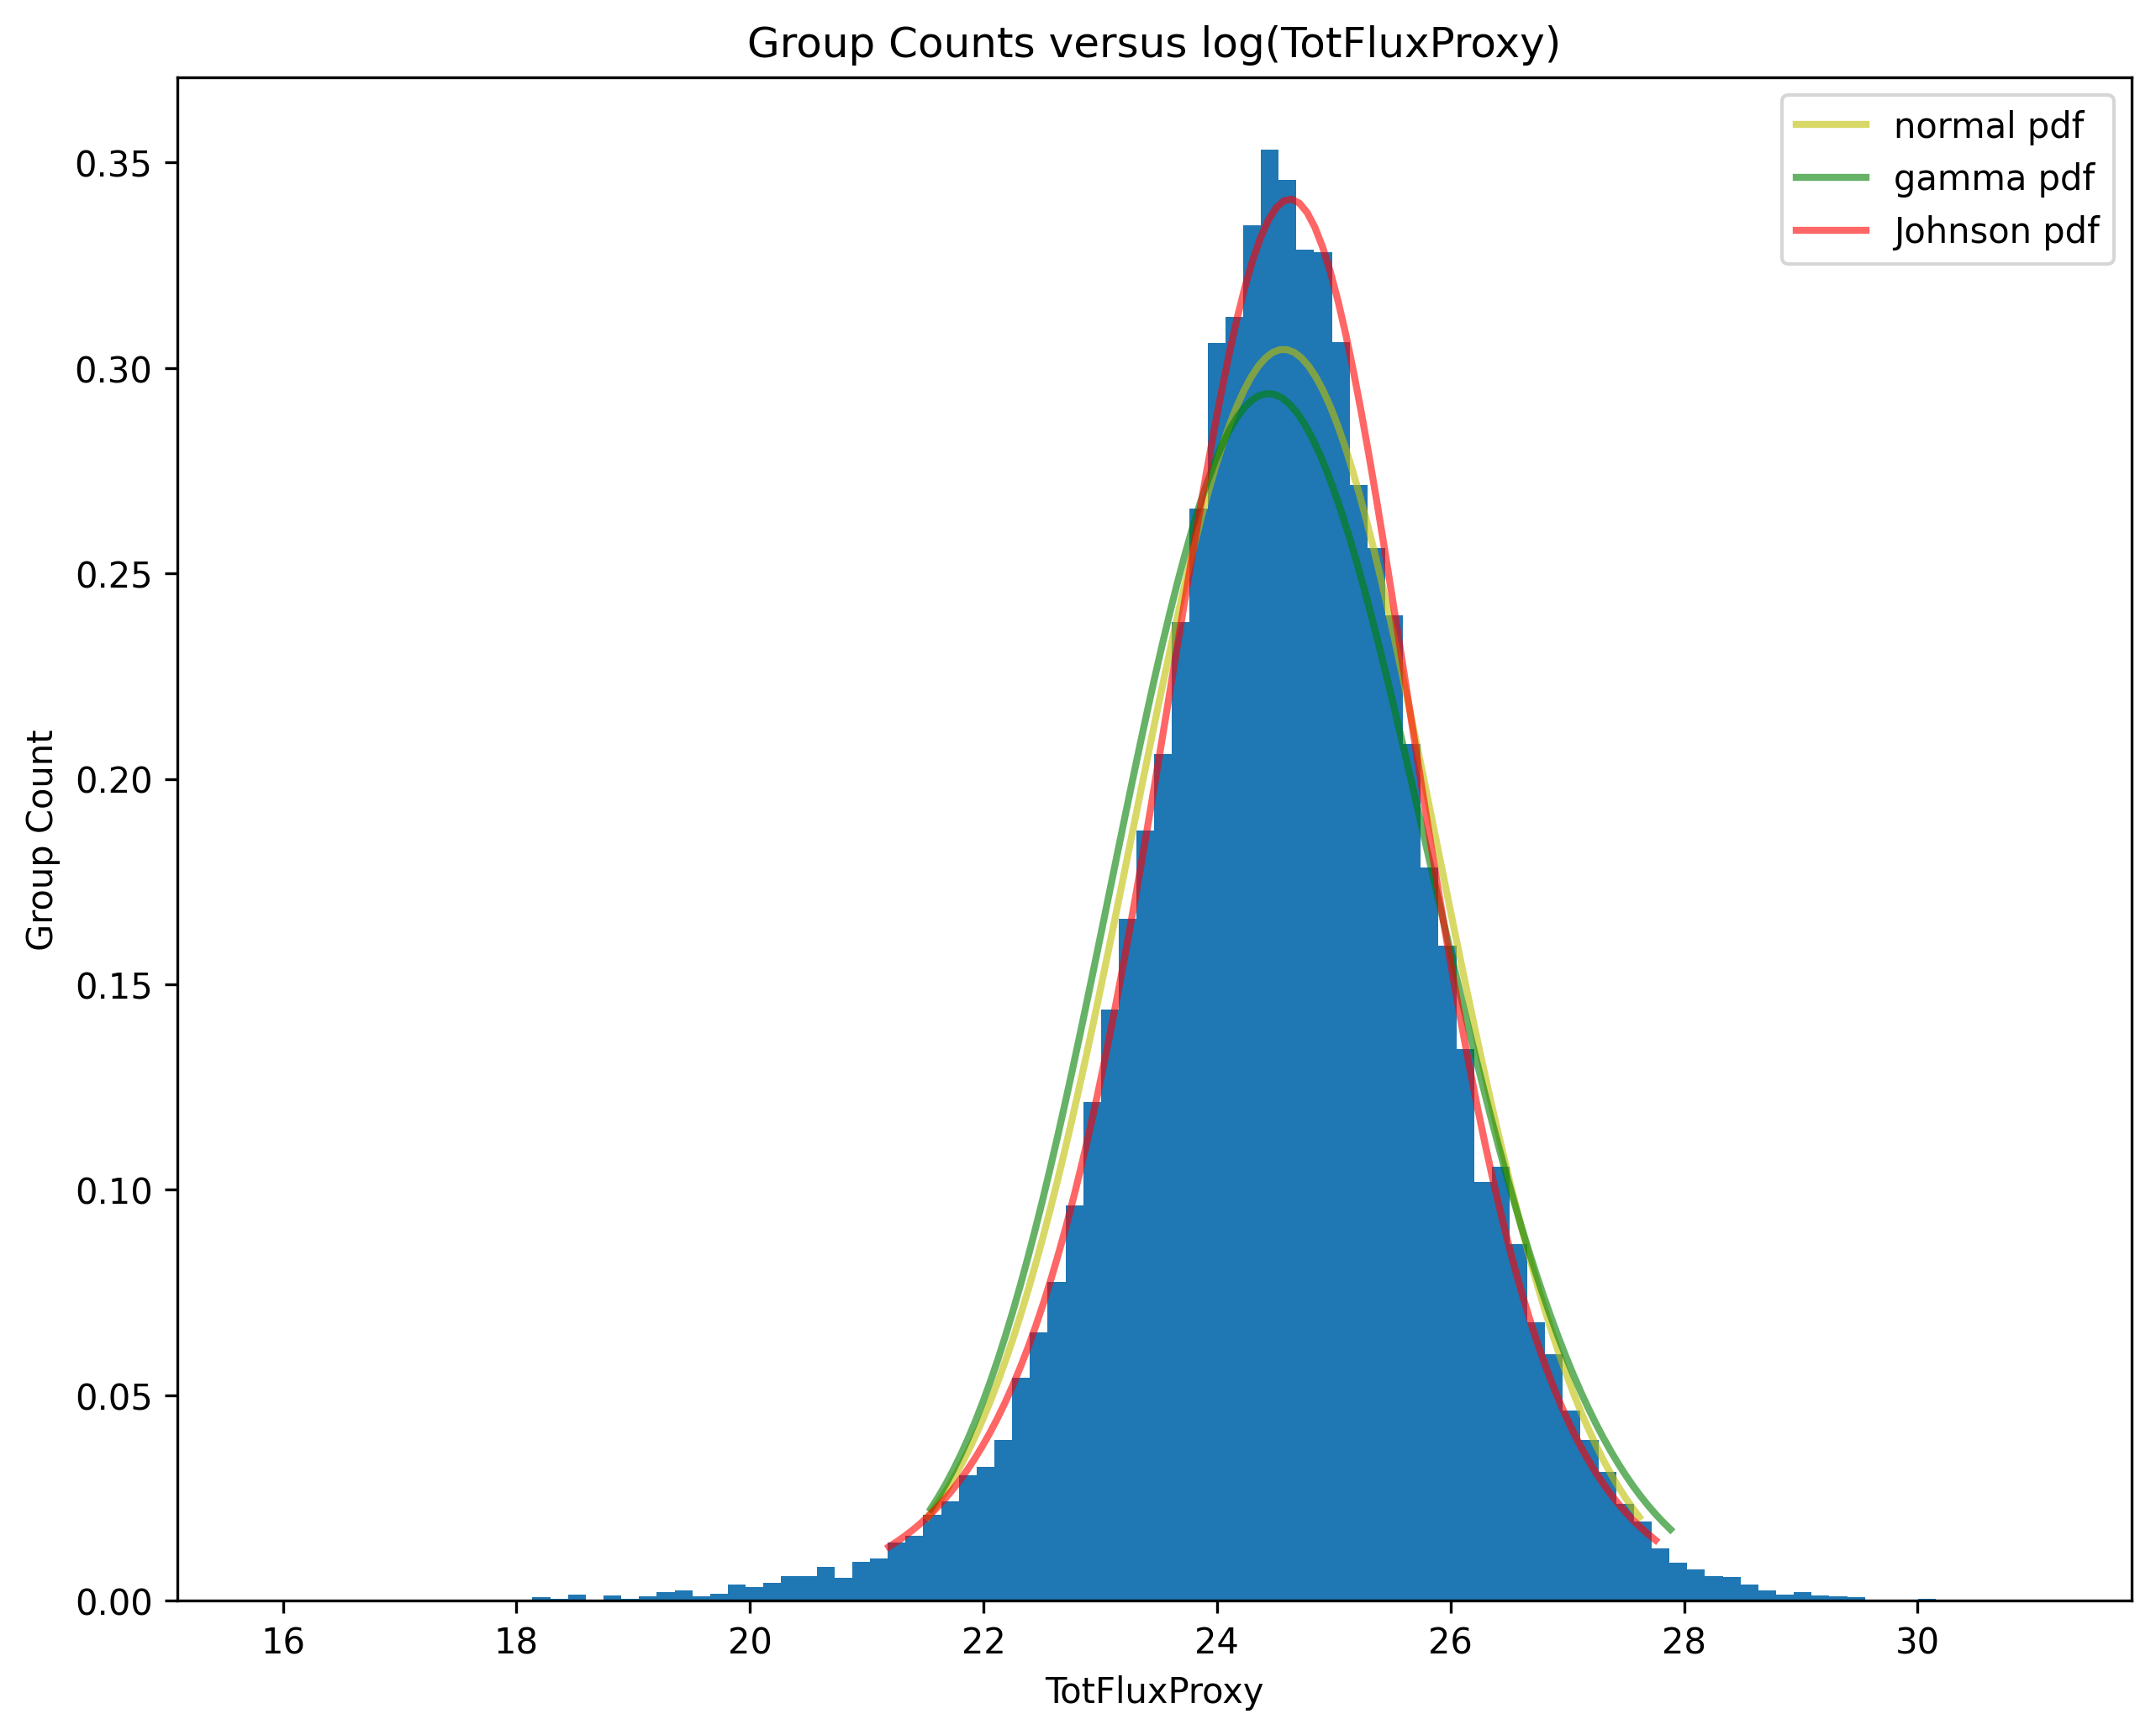

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_37807/3577580592.py:96: RuntimeWarning: divide by zero encountered in log
  y = np.log(ForGroup[xfield].data)


MassProxy Normal Fit 24.947528839111328, 7.645202159881592
MassProxy Gamma fit : 4.277982643060758 15.645778246895961 2.6209590978914905
MassProxy Johnson fit : -0.41191454643519954 1.2743941004823303 26.408223968566908 2.291099906278344


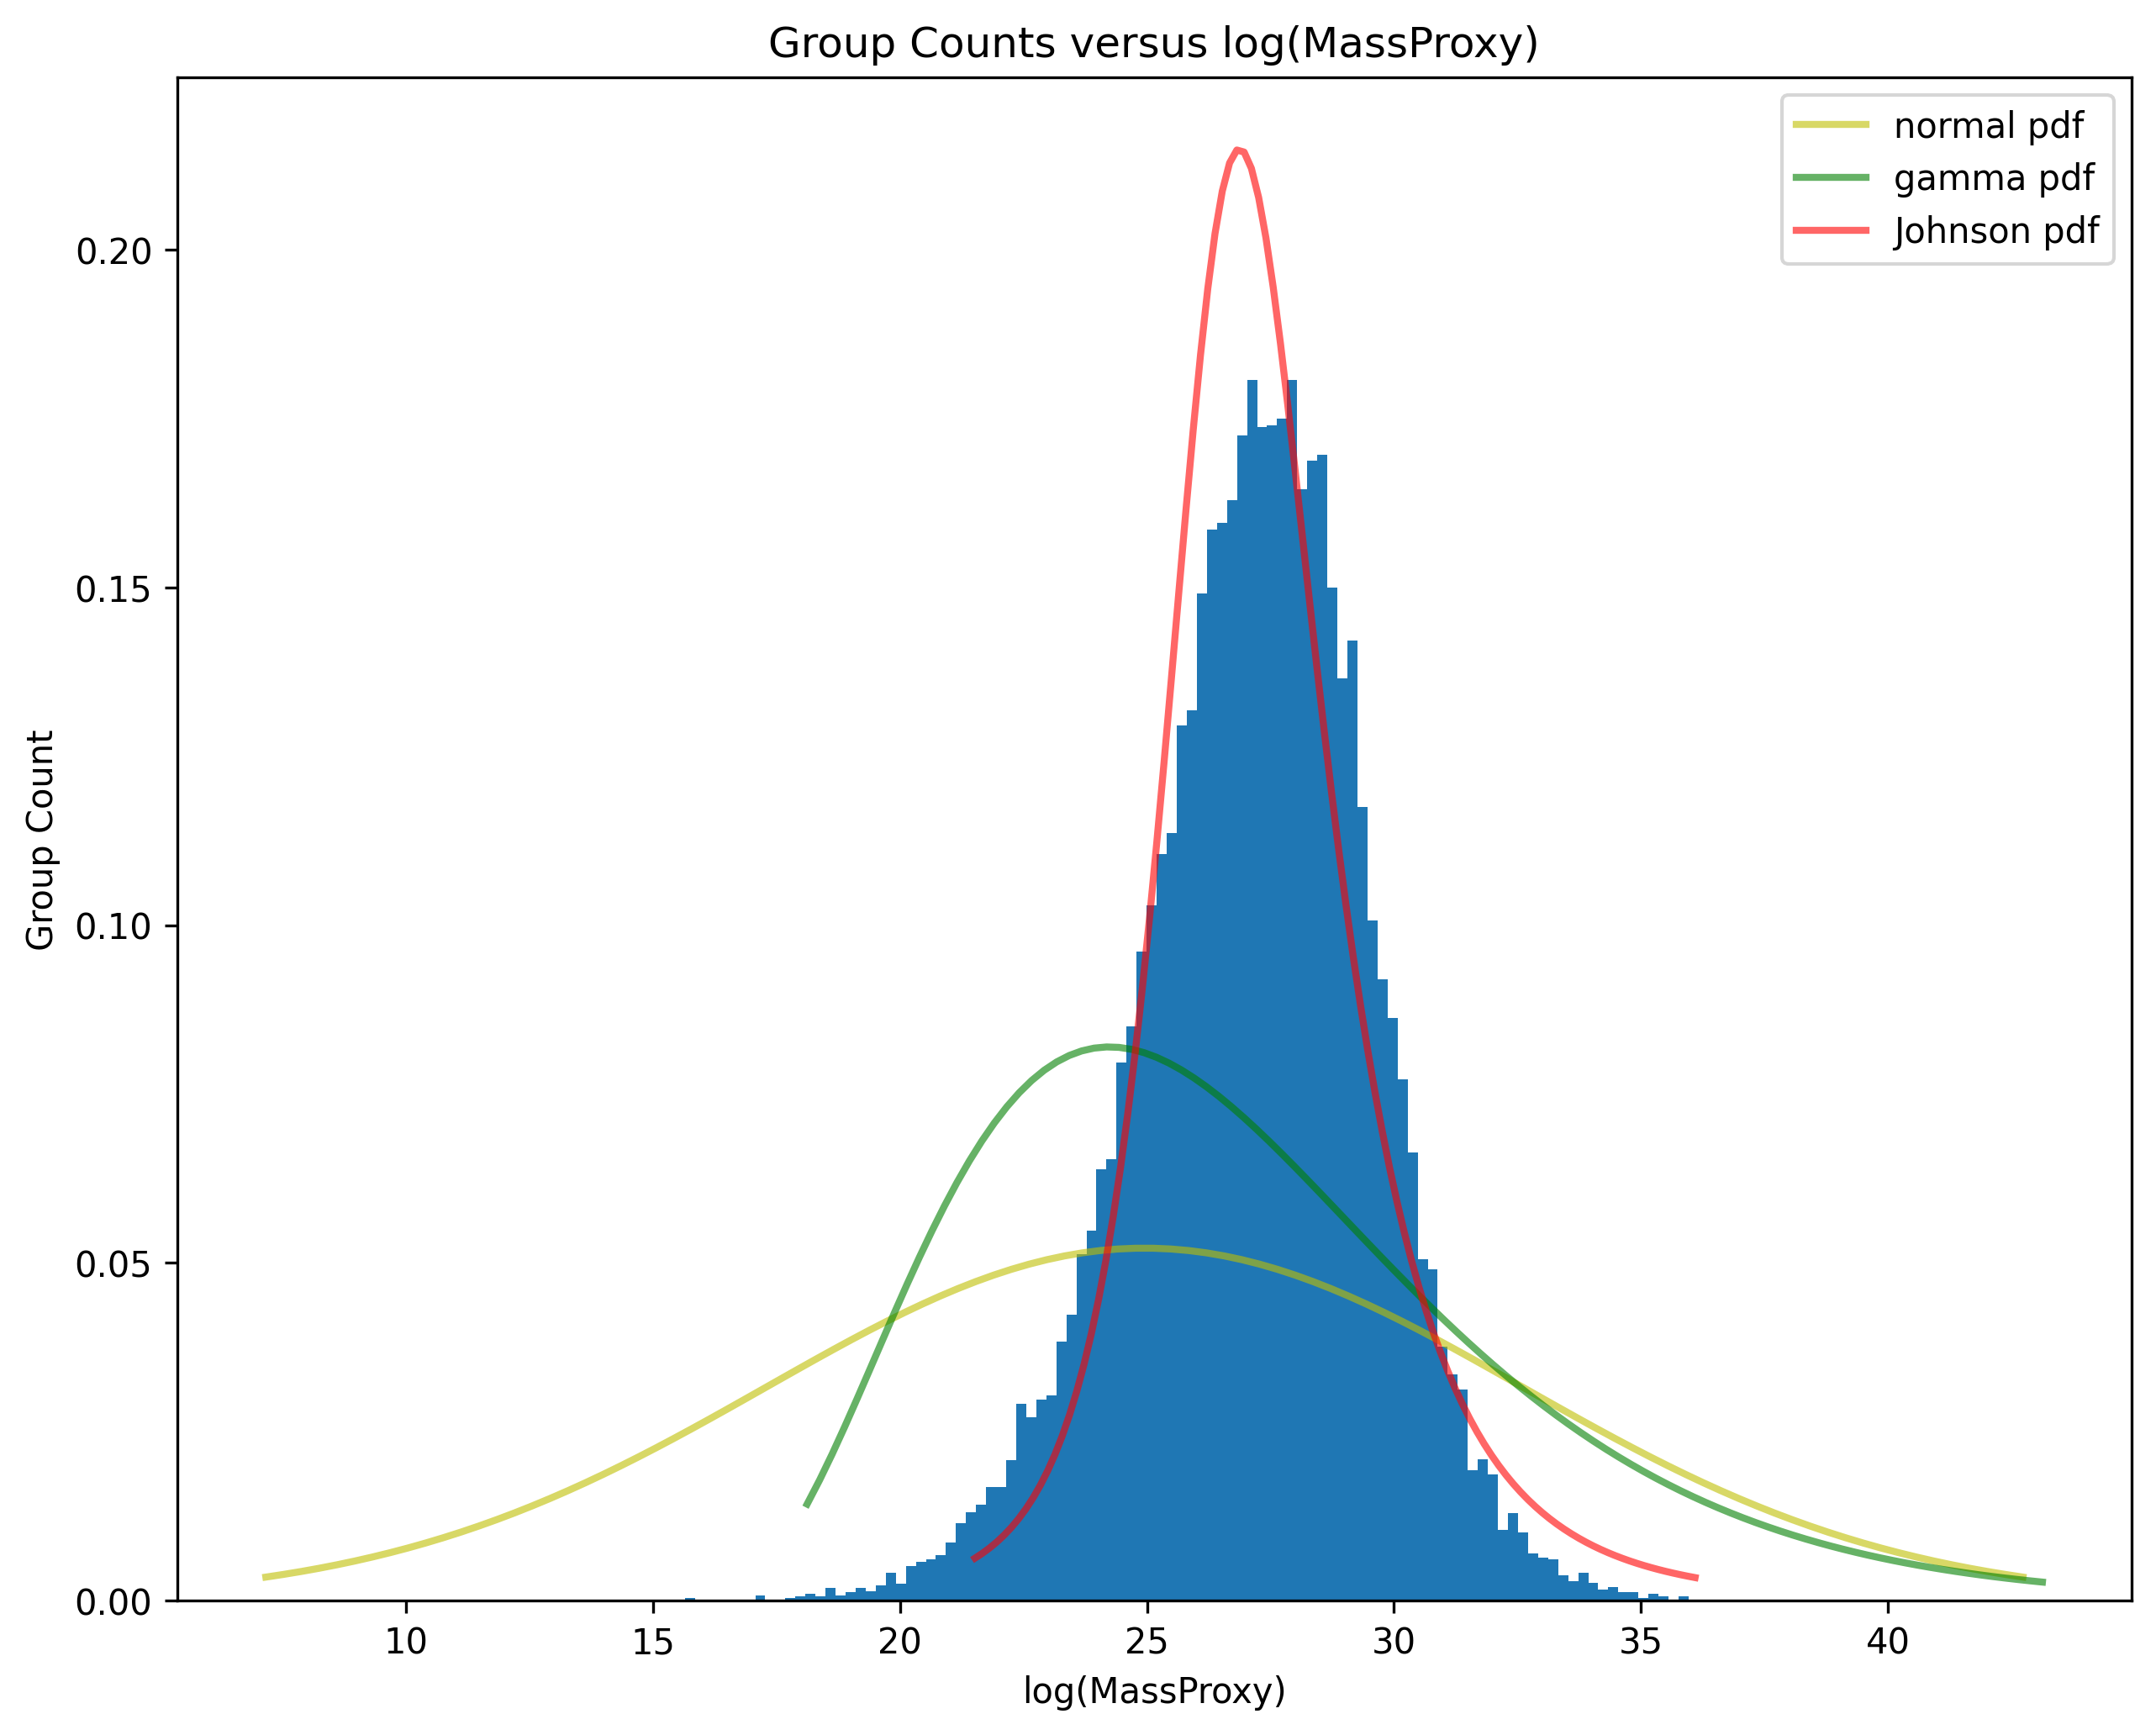

/var/folders/cj/z259fmwd41dgzl8mq8nppwd40000gn/T/ipykernel_37807/3577580592.py:127: RuntimeWarning: divide by zero encountered in log
  y = np.log(ForGroup[xfield].data)


MassA Normal Fit 27.054349899291992, 8.260612487792969
MassA Gamma fit : 3.867245831859573 17.948420776942054 2.9775699499839536
MassA Johnson fit : -0.4141968515427217 1.276128982332051 28.705499299874347 2.2949167491905835


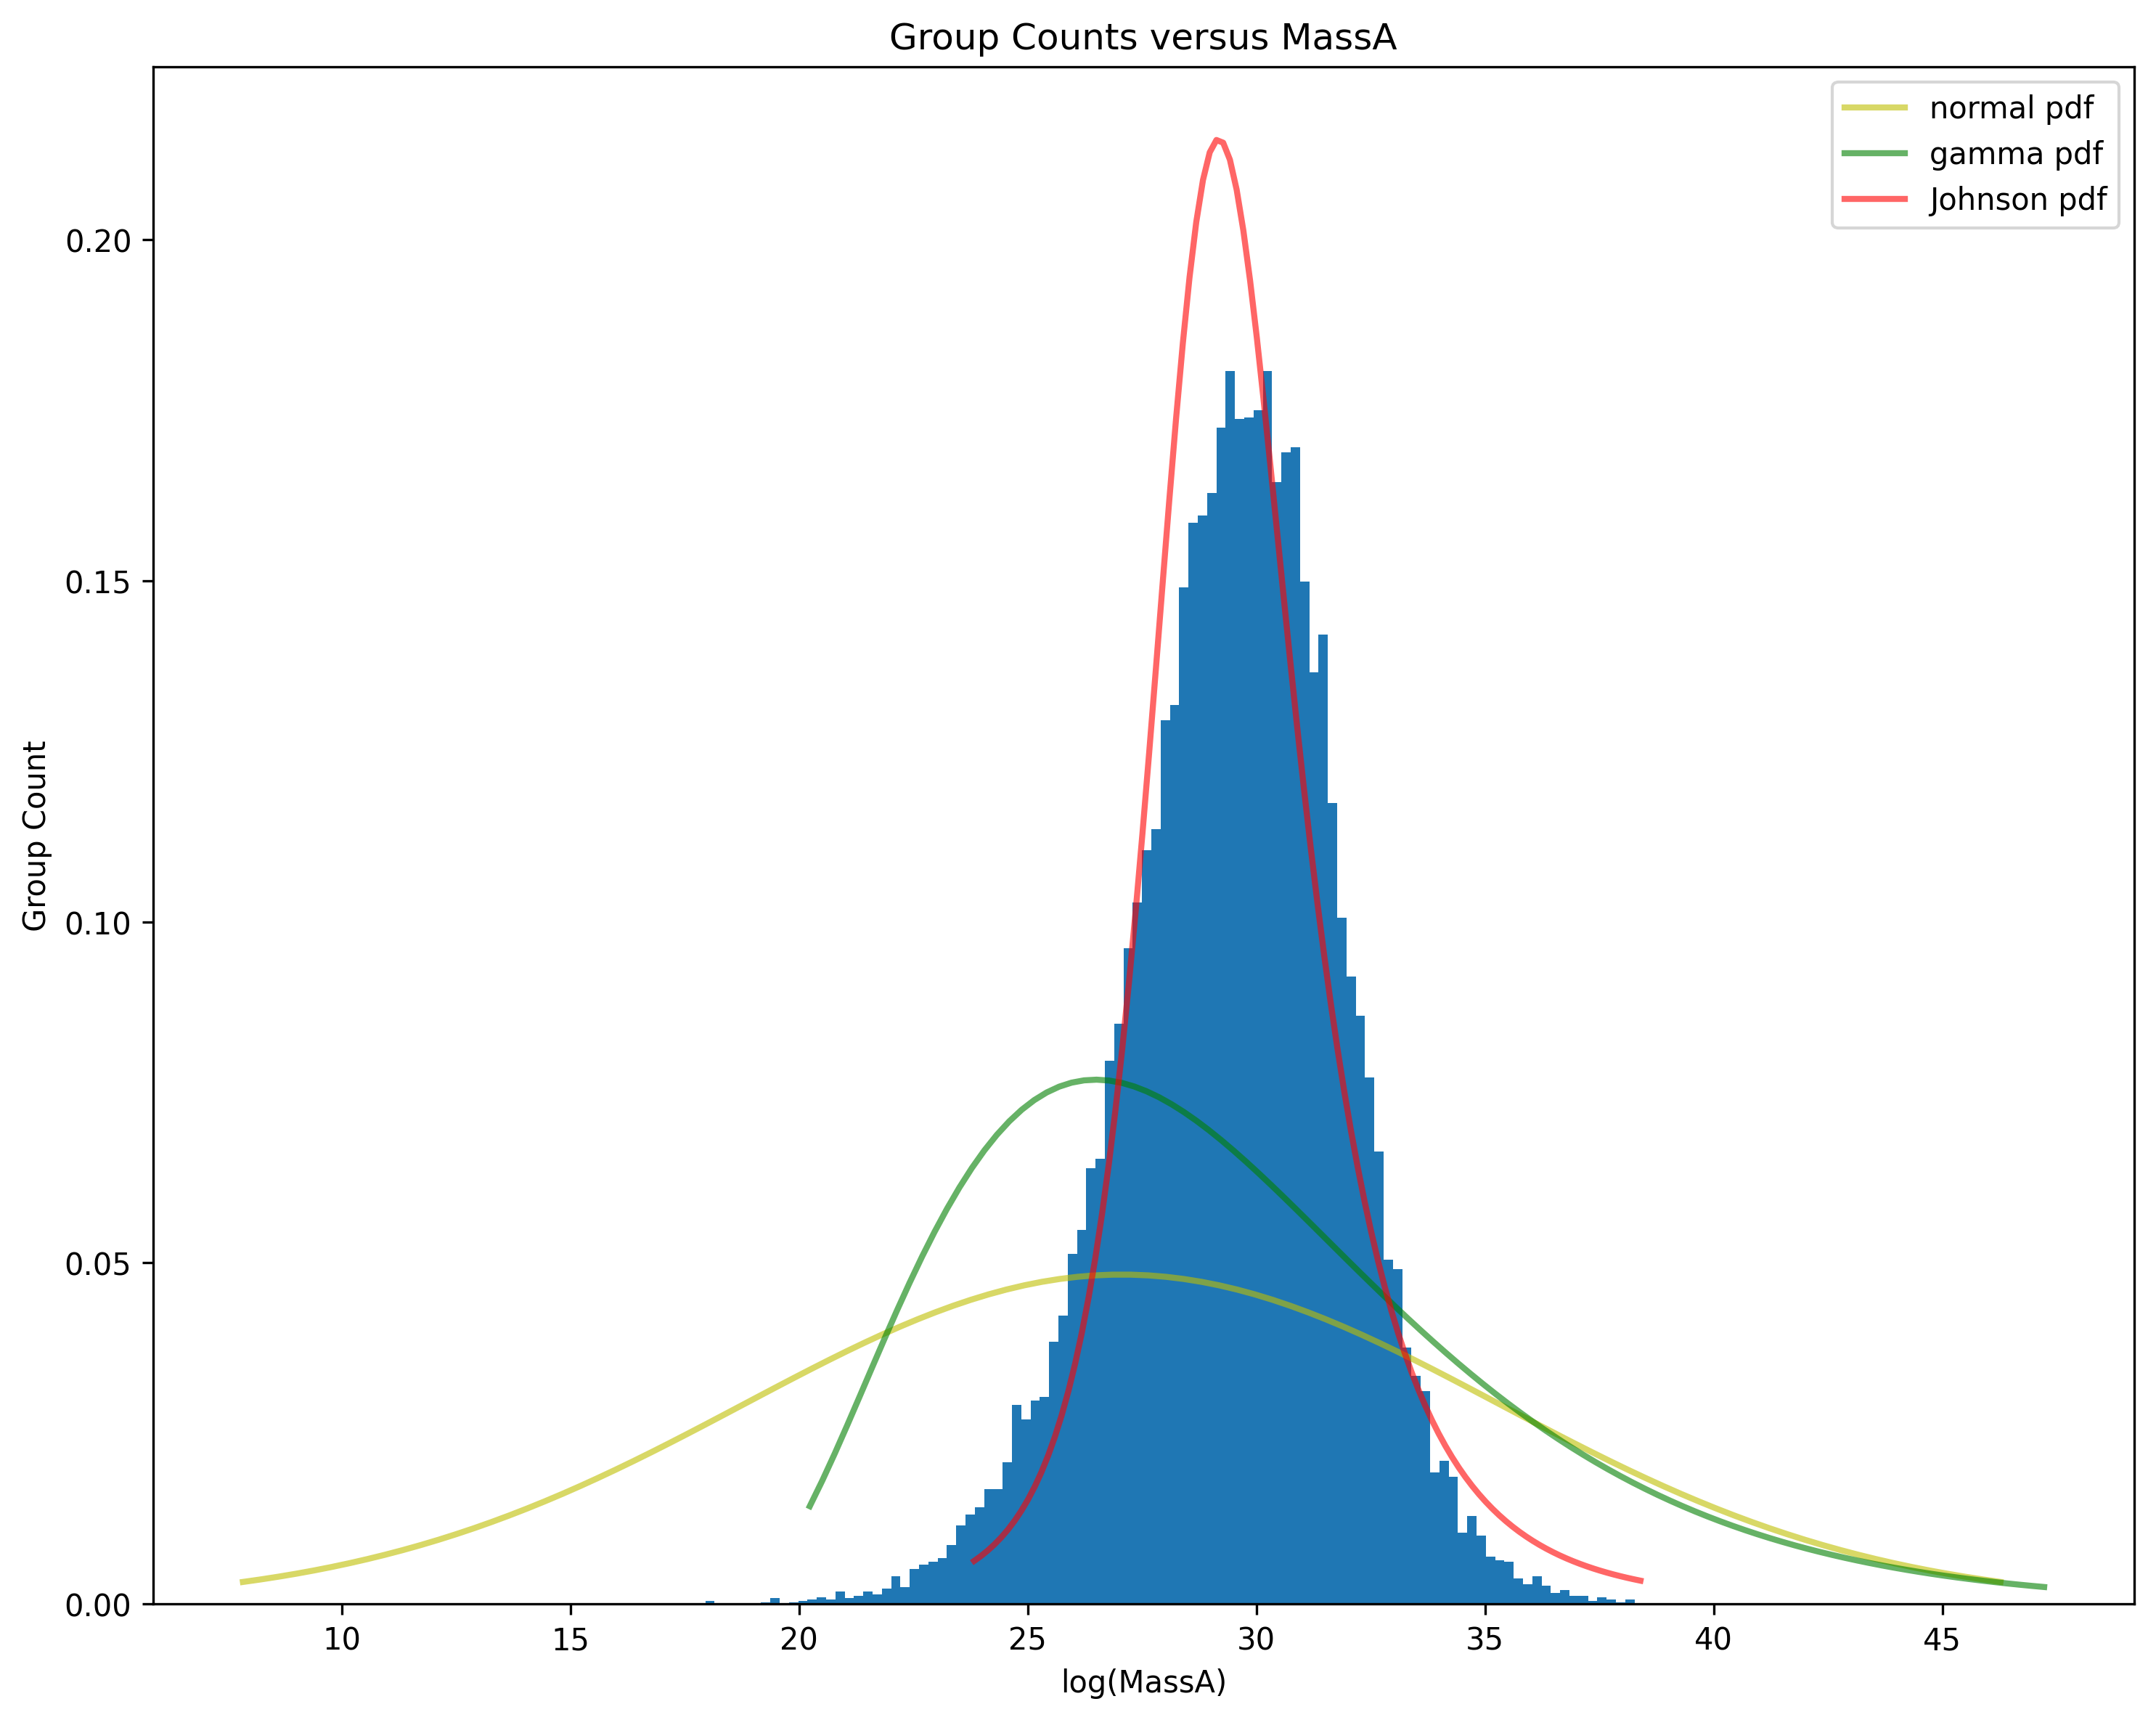

-24.846533
-17.982227


<Figure size 3000x2400 with 0 Axes>

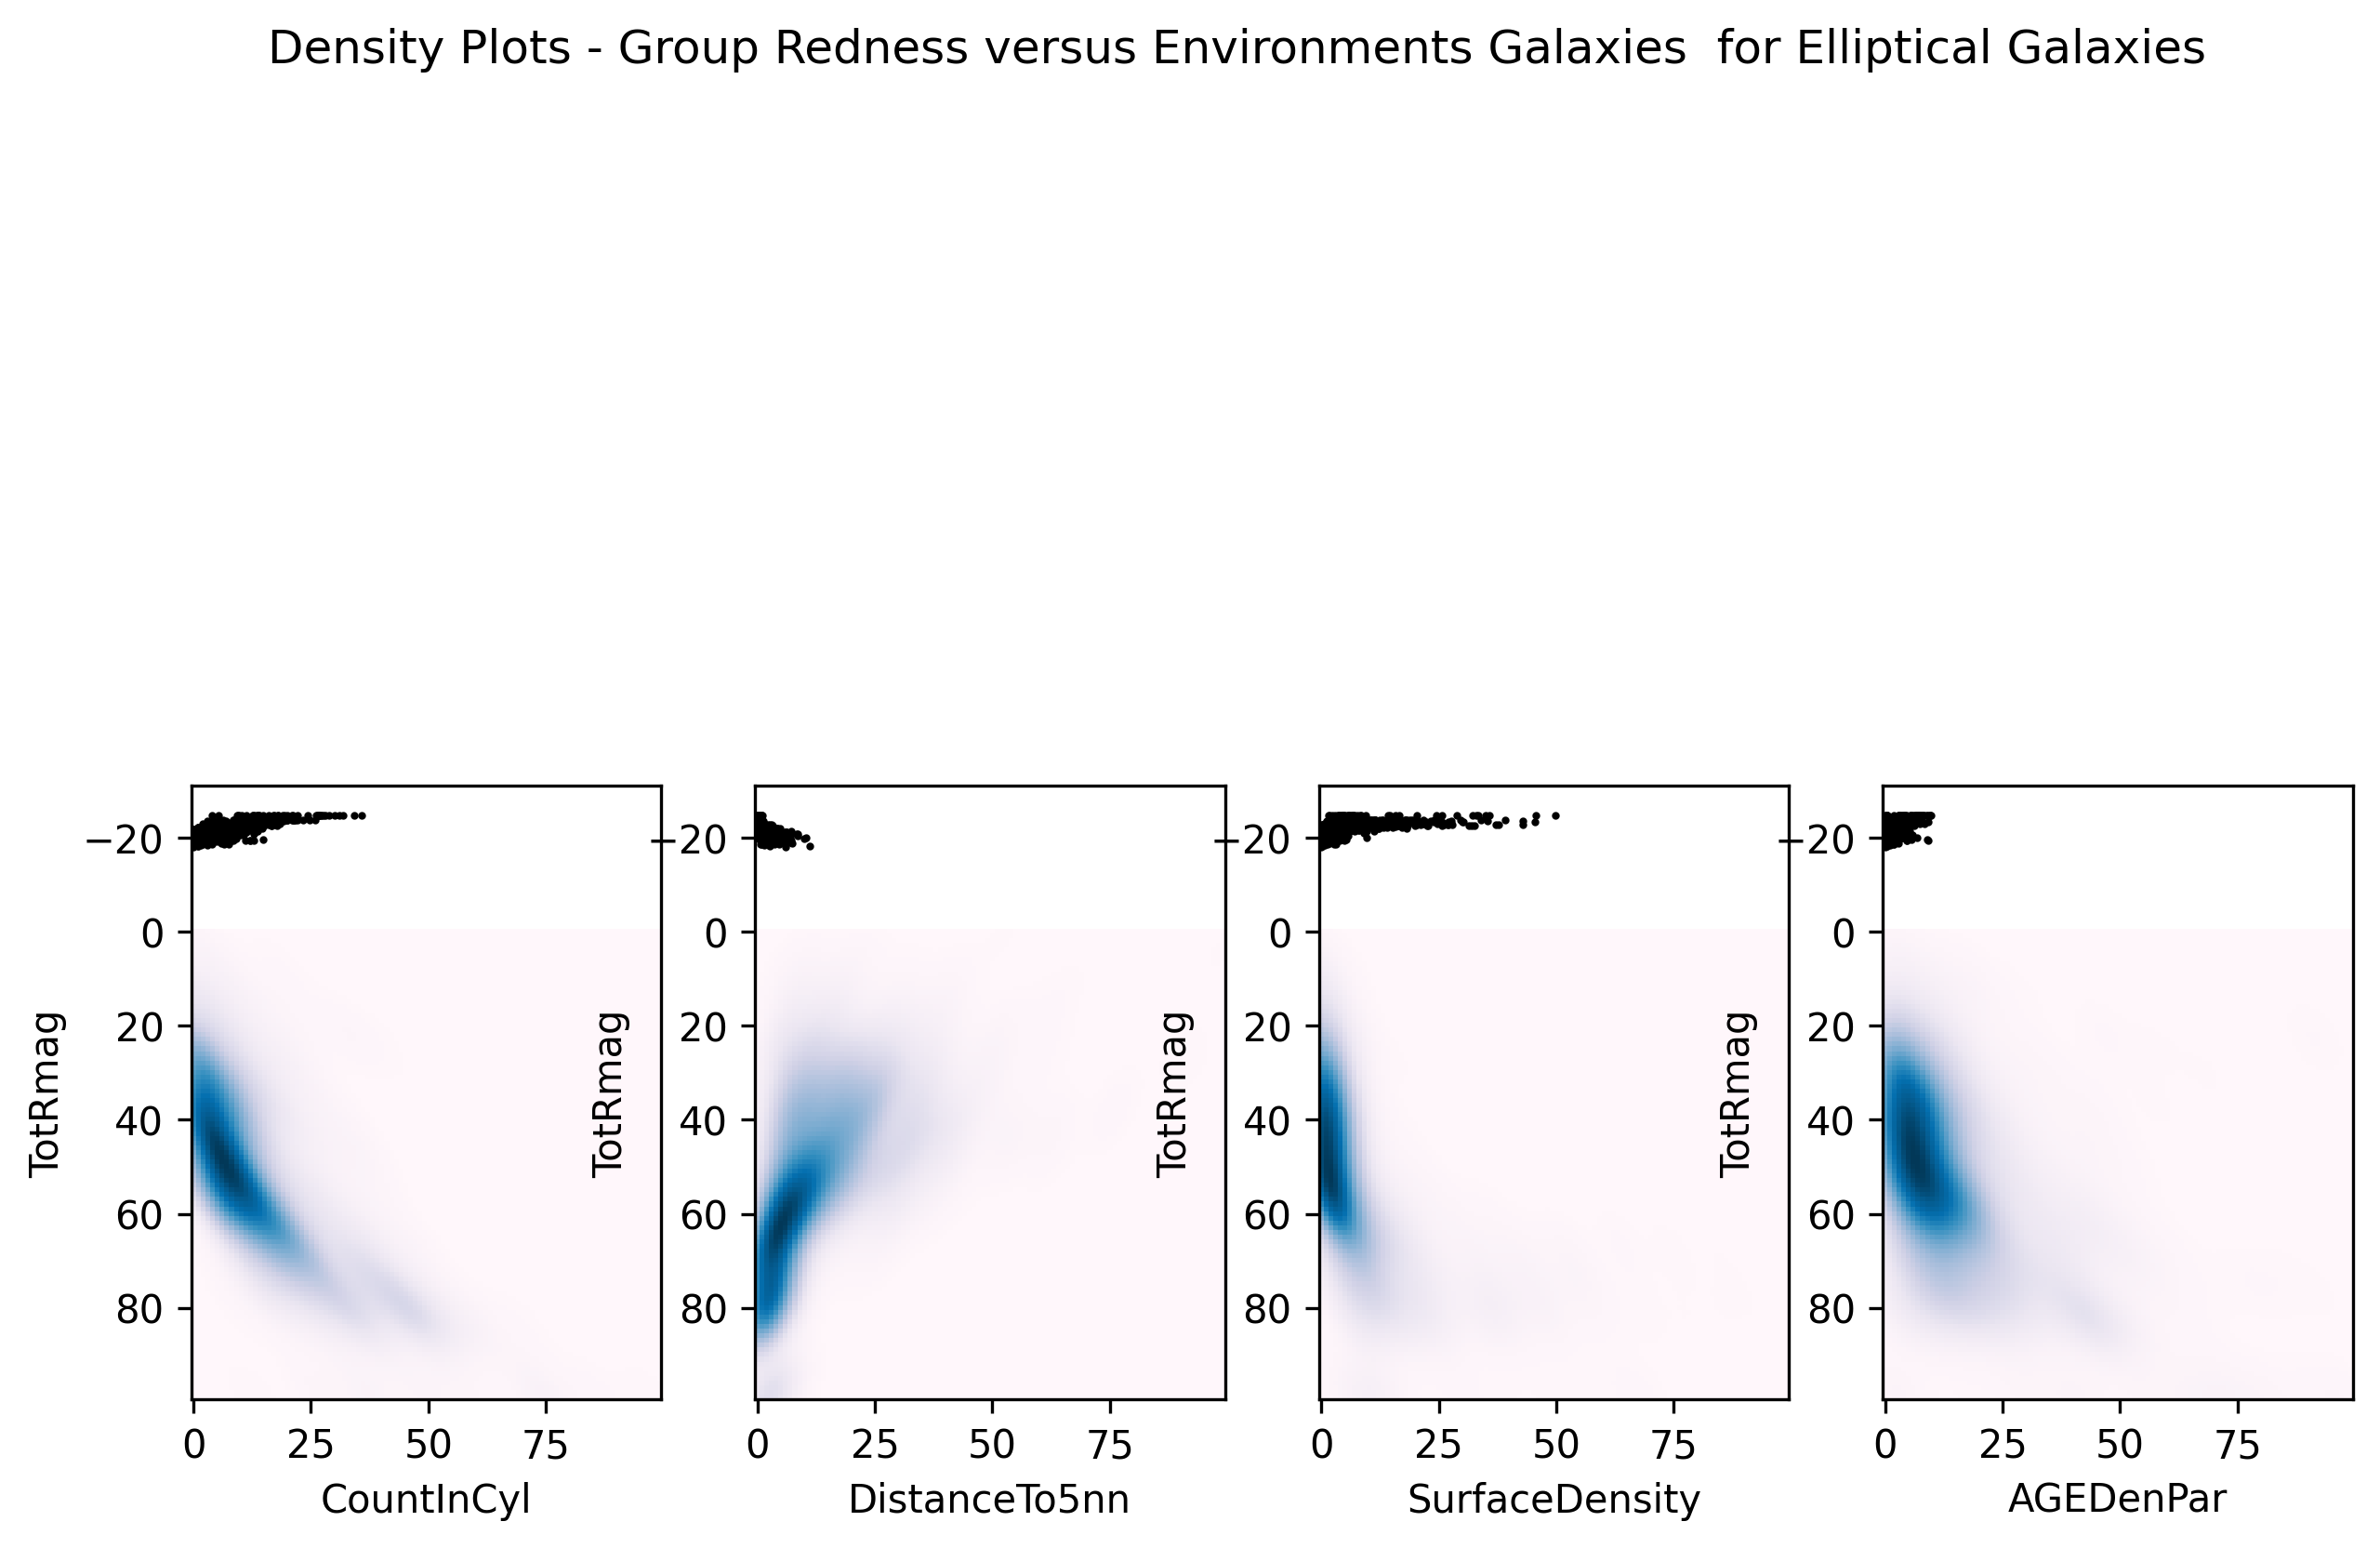

-24.846533
-17.982227


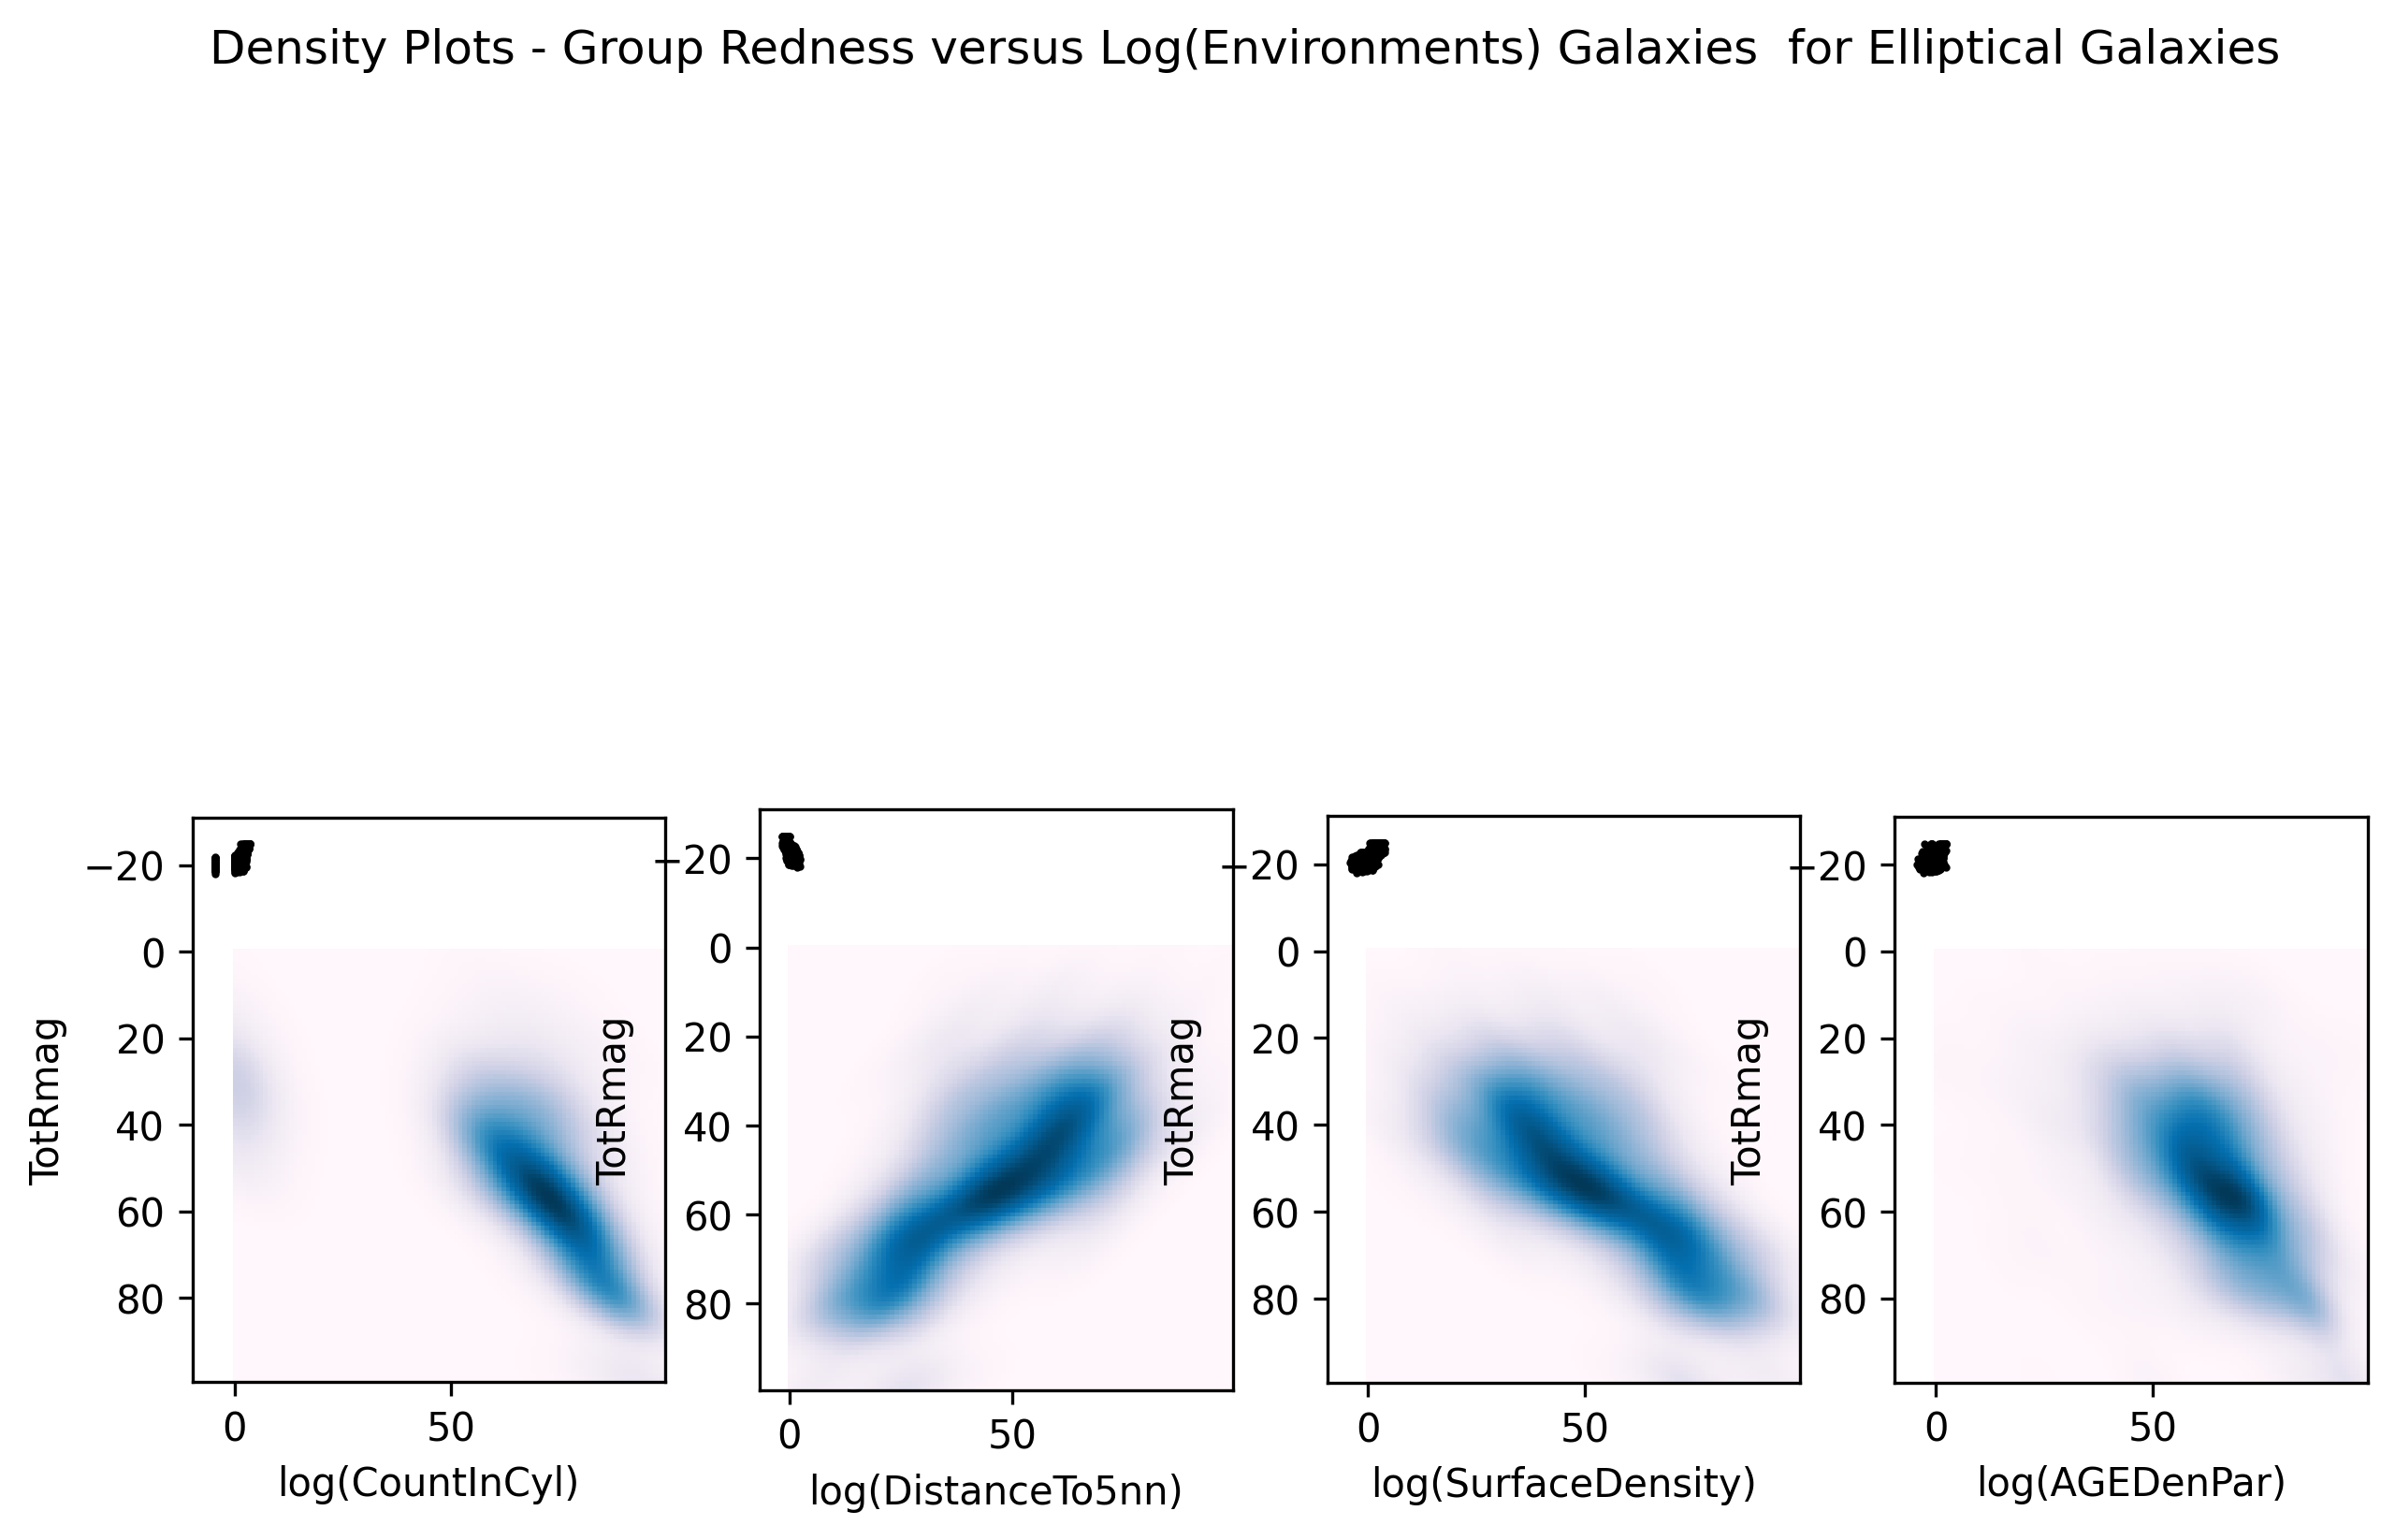

1
143


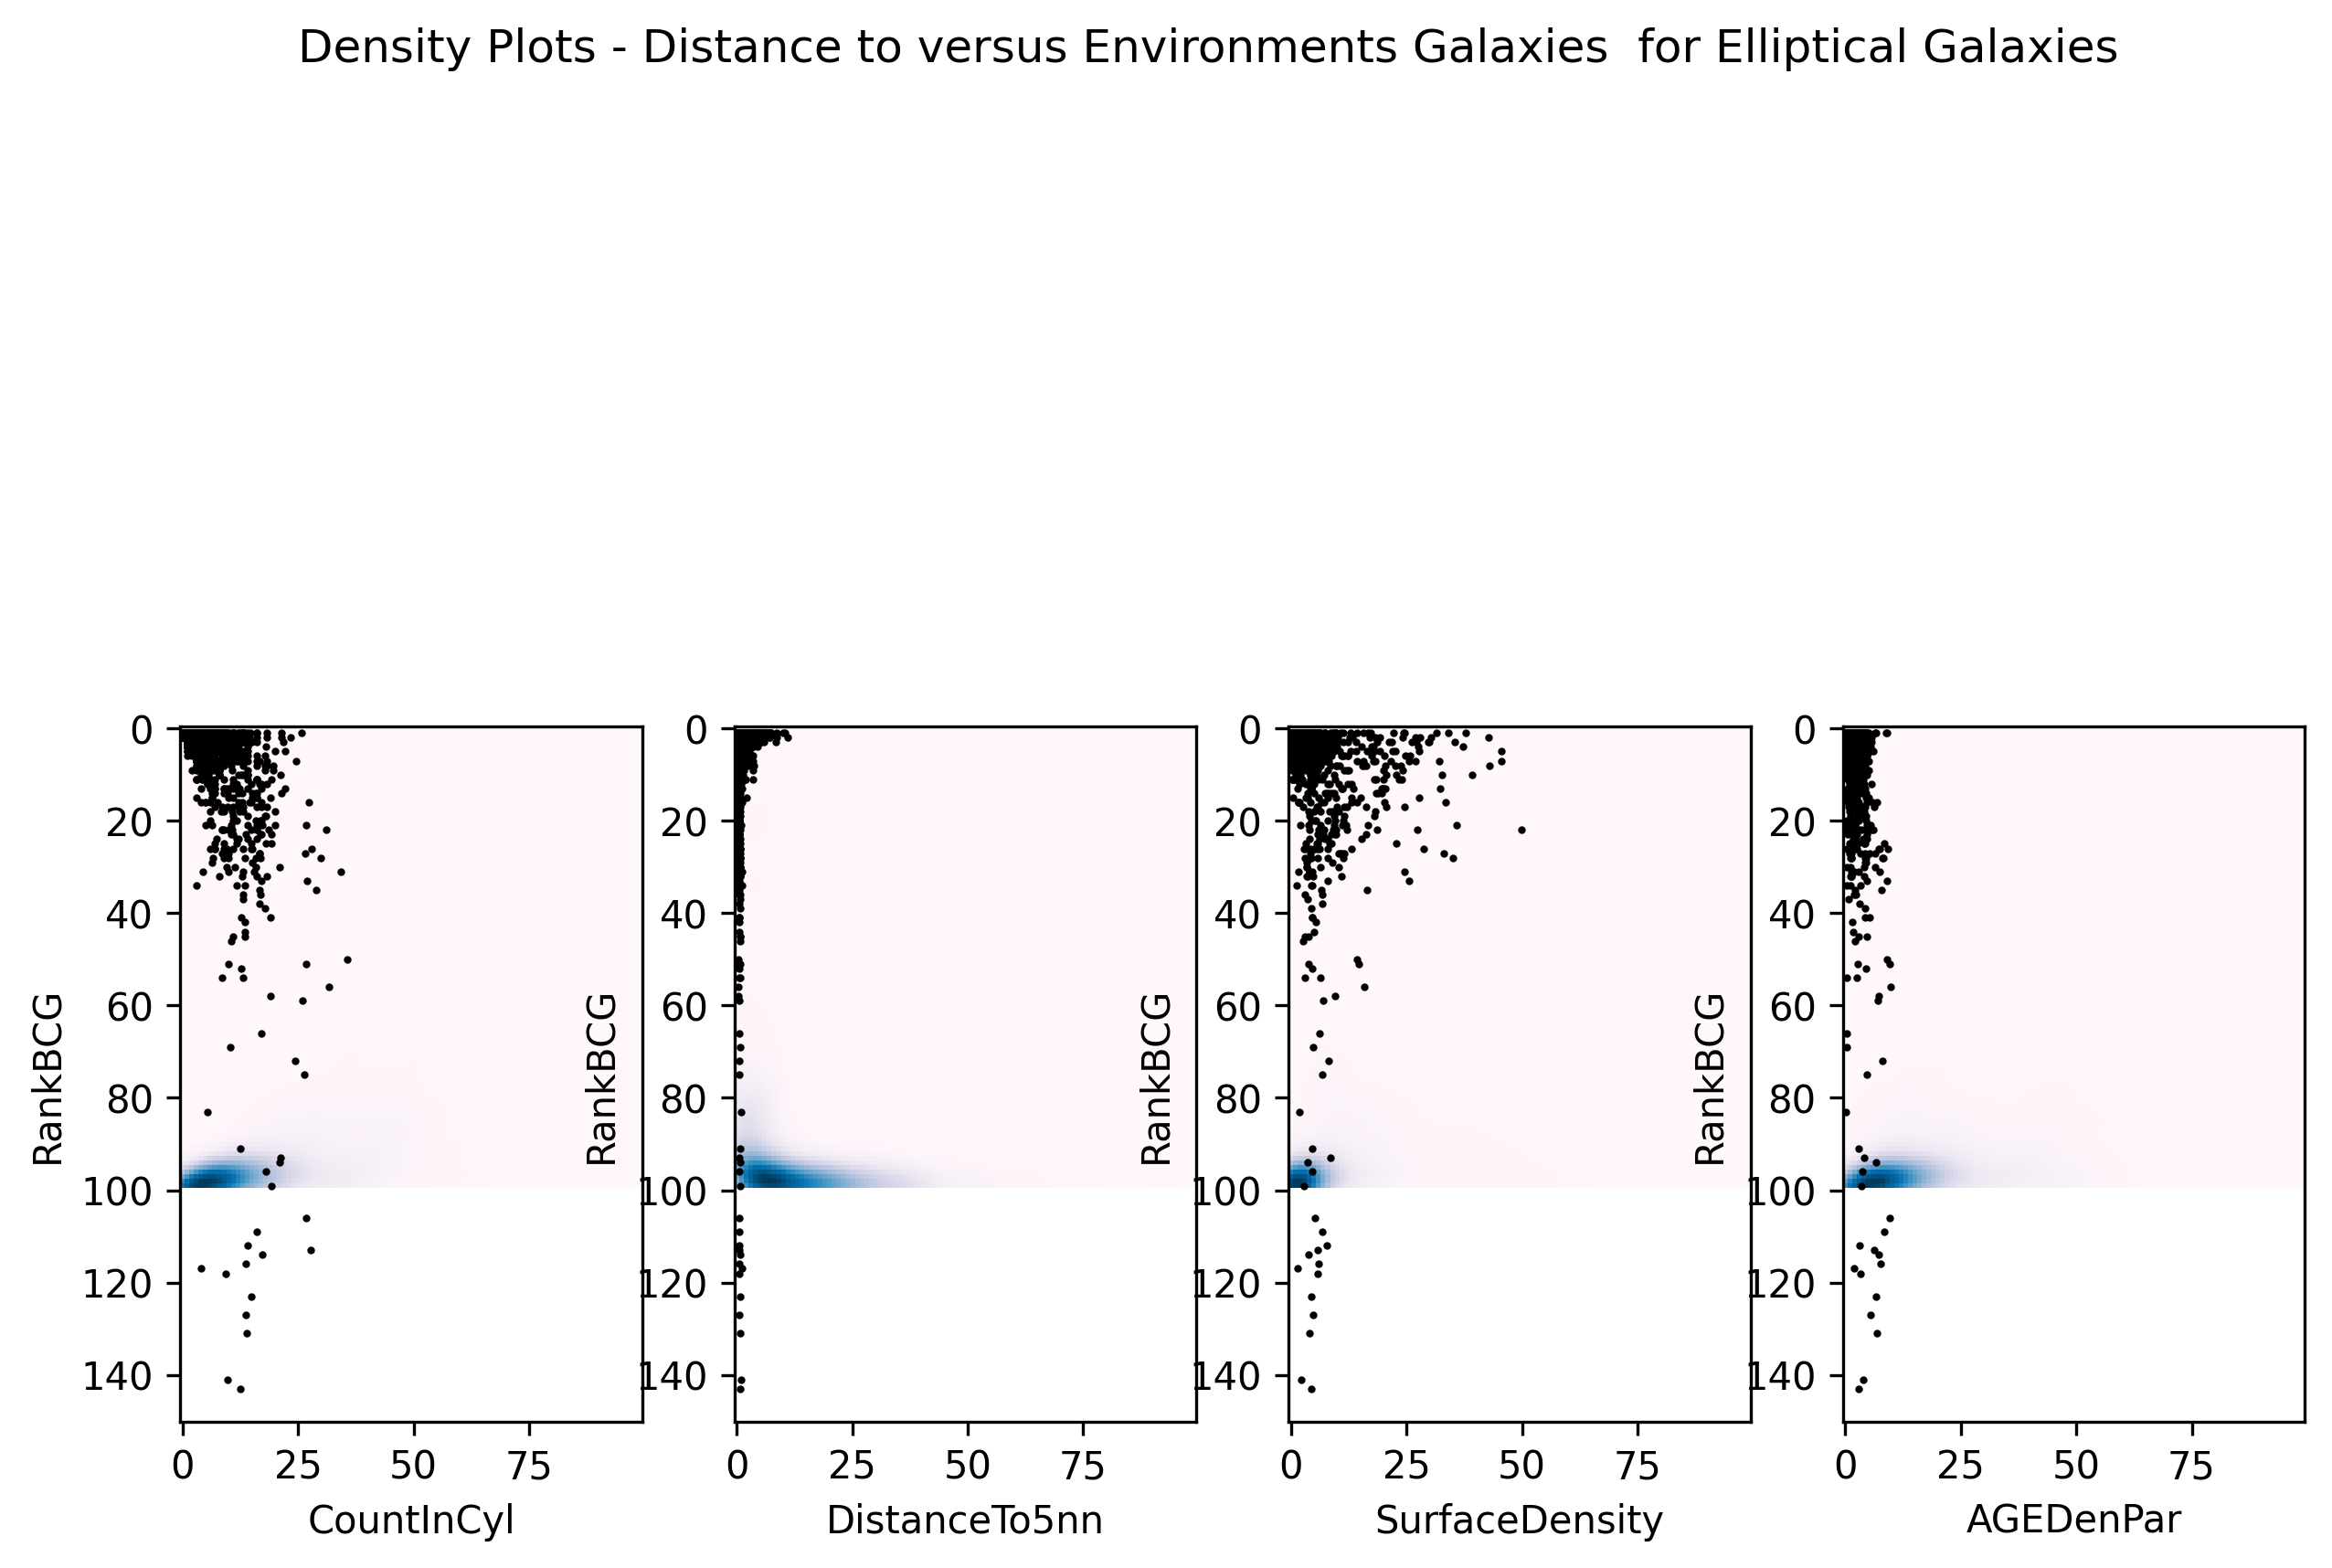

1
143


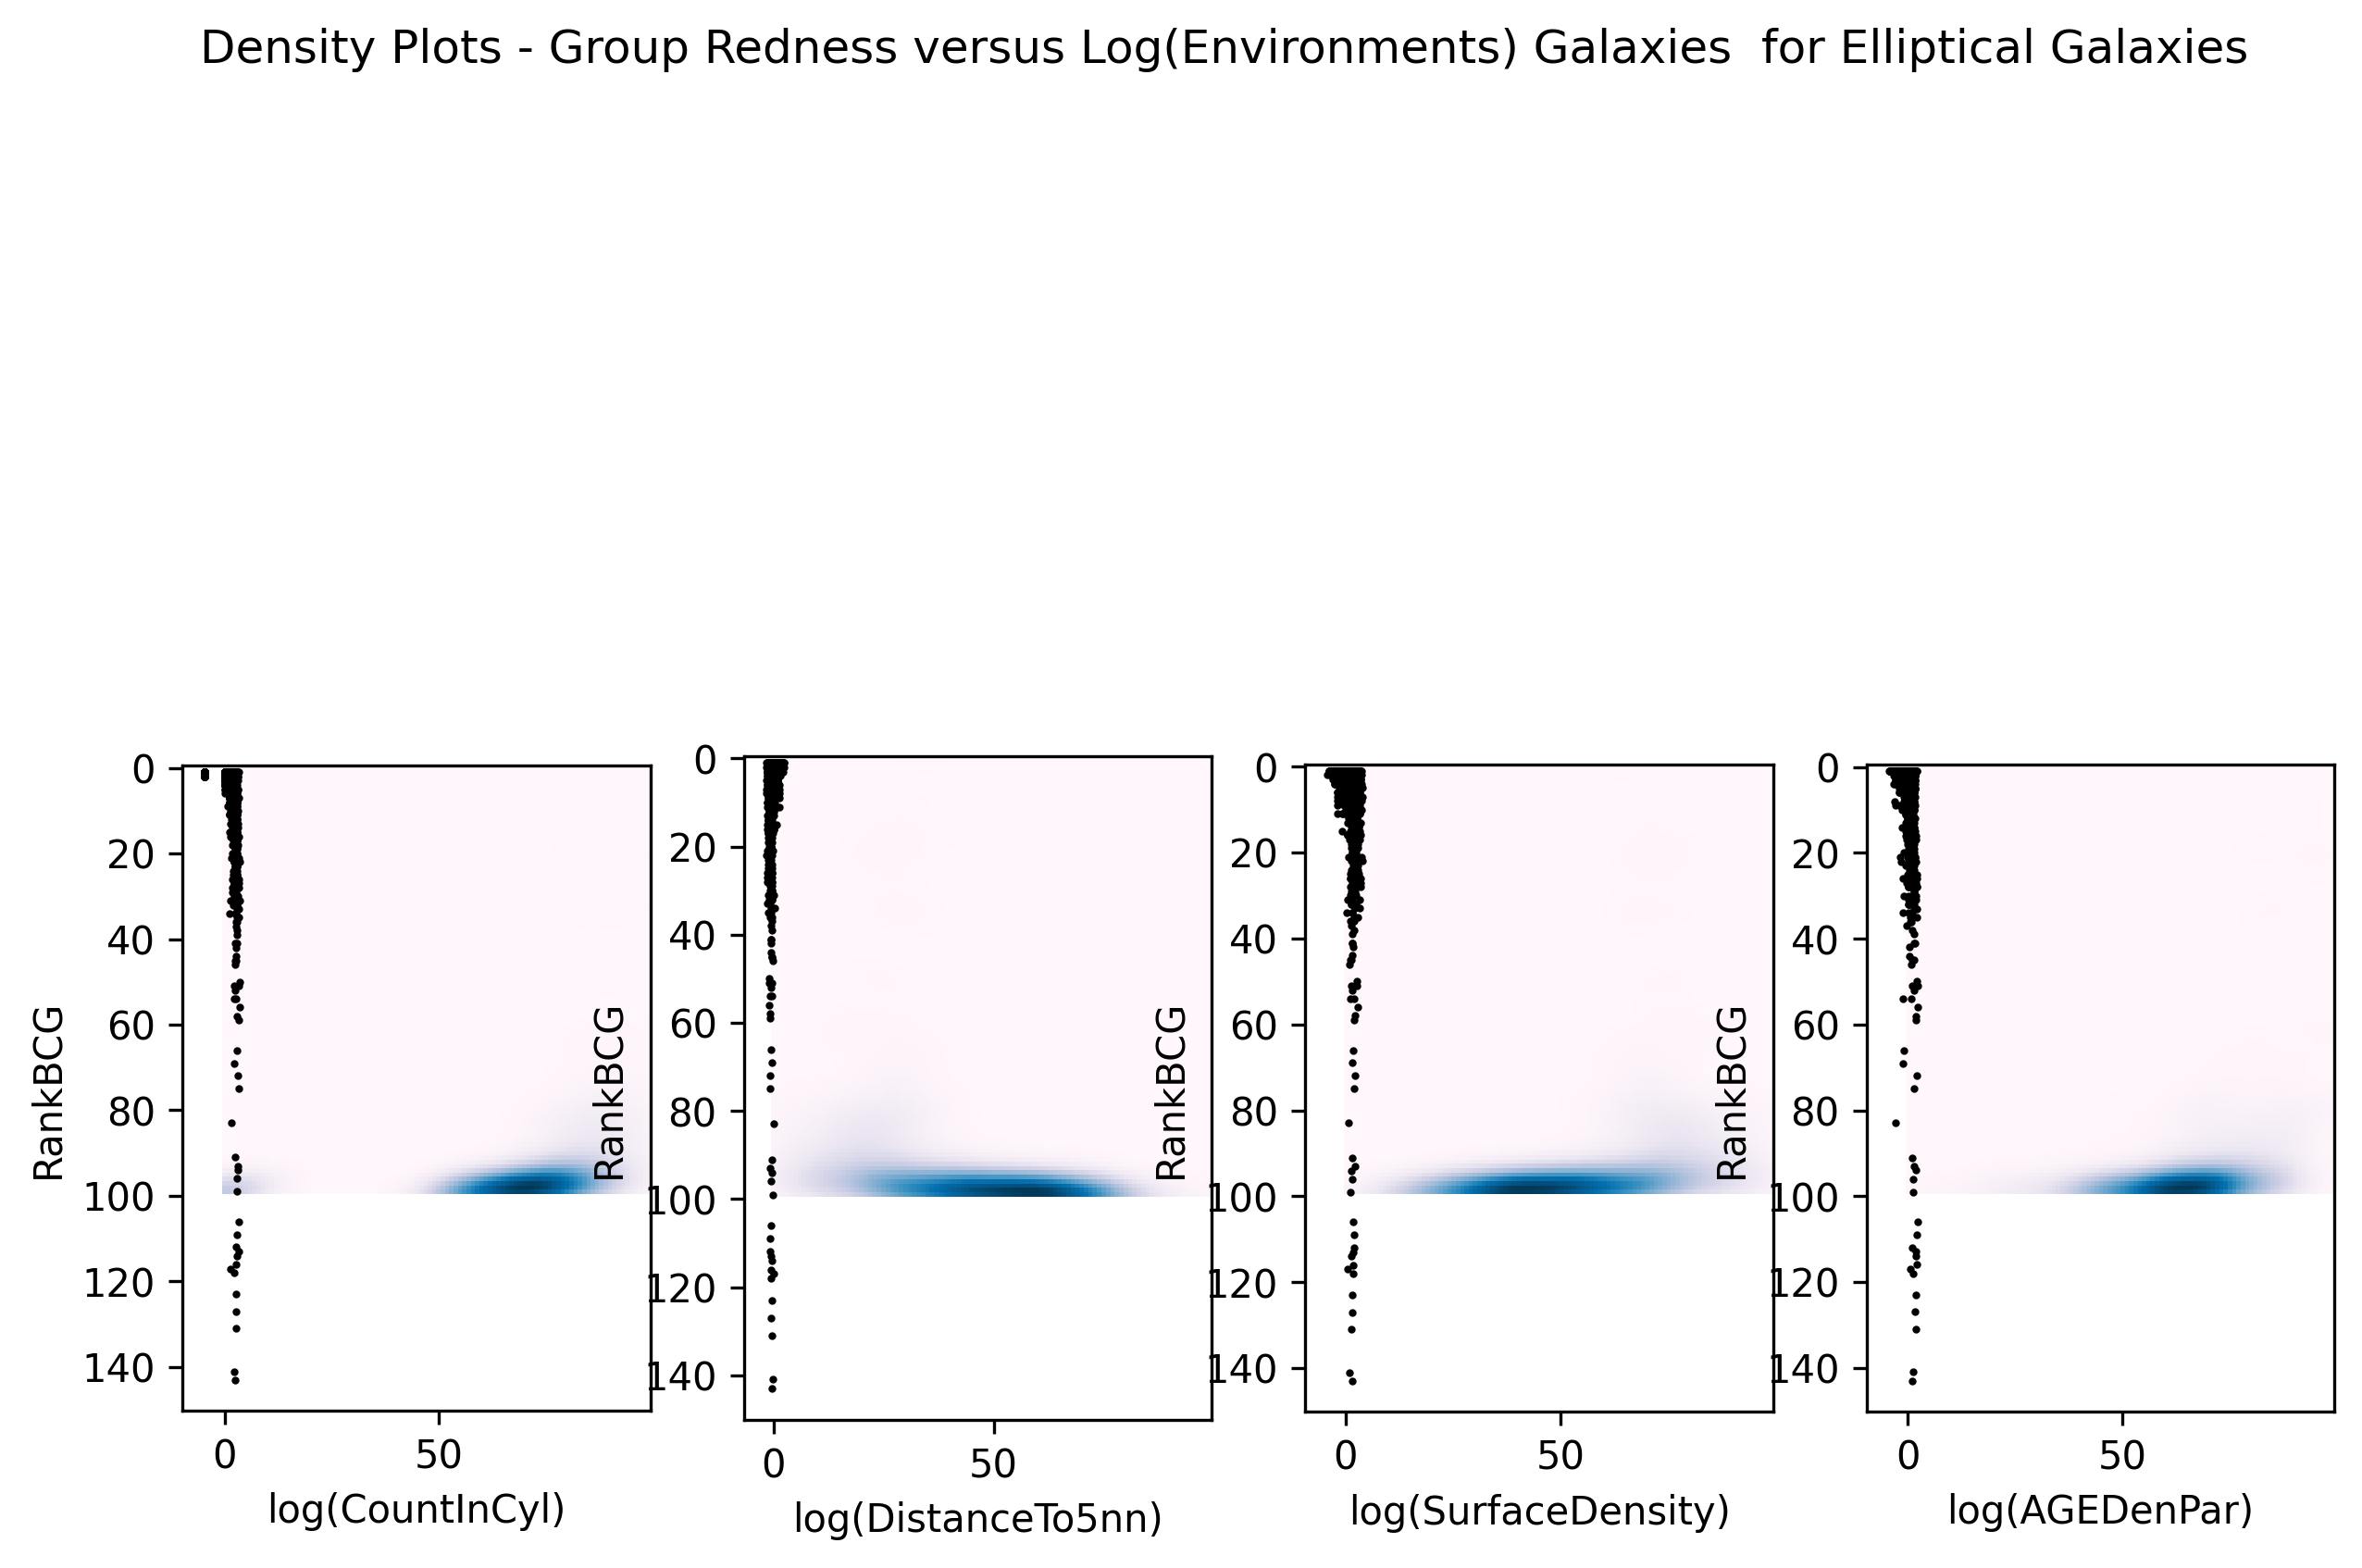

Number of axes : 4


KeyError: 'GeoS4'

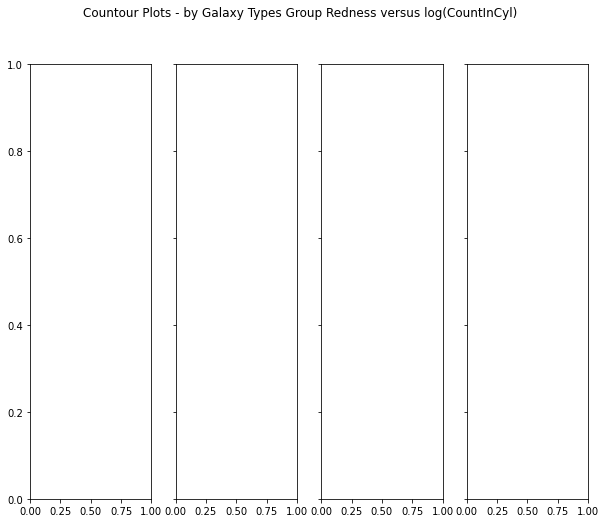

In [1]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd


ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
## Clean Data

binCount = 100

fig = plt.figure(figsize=(12, 16), dpi=300)

xfield = 'TotRmag'
ax1 = fig.add_subplot(1, 1, 1)
ax1.title.set_text('Group Counts versus '+xfield)
ax1.set_ylabel('Group Count')
ax1.set_xlabel(xfield)

an, bn =stats.norm.fit(ForGroup[xfield].data)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ag, bg, cg =stats.gamma.fit(ForGroup[xfield].data)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(ForGroup[xfield].data)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

# Perform Cox Box
#print(stats.boxcox(RErange[xfield]))
transdata, lamda = stats.boxcox(-ForGroup[xfield])
print(f"{xfield} BoxCox lamda {lamda}")
acn ,bcn =stats.norm.fit(transdata)
print(f"{xfield} Normal fit : {acn} {bcn}")
xcn0, xcn1 = stats.norm.ppf([0.01, 0.99], acn, scale = bcn)
xcn = np.linspace(xcn0,xcn1,100)
# y values for CoxBox
ycn = (lamda / xcn**lamda-1)

ax1.hist(ForGroup[xfield].data, bins=binCount, density=True)
ax1.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax1.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax1.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax1.legend()
fig.savefig('../../ChartsPlots/GroupTotRmagHistogram.png', dpi=300, bbox_inches='tight')
plt.show()


xfield = 'TotFluxProxy'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax2 = fig.add_subplot(1, 1, 1)
ax2.title.set_text('Group Counts versus log('+xfield+')')
ax2.set_ylabel('Group Count')
ax2.set_xlabel(xfield)

y = np.log(ForGroup[xfield].data)

an, bn =stats.norm.fit(y)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ag, bg, cg =stats.gamma.fit(y)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(y)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax2.hist(y, bins=binCount, density=True)
ax2.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax2.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax2.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax2.legend()
fig.savefig('../../ChartsPlots/GroupLogTotFluxProxyHistogram.png', dpi=300, bbox_inches='tight')
plt.show()


xfield = 'MassProxy'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax3 = fig.add_subplot(1, 1, 1)
ax3.title.set_text('Group Counts versus log('+xfield+')')
ax3.set_ylabel('Group Count')
ax3.set_xlabel('log('+xfield+')')

y = np.log(ForGroup[xfield].data)

an, bn =stats.norm.fit(y)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ag, bg, cg =stats.gamma.fit(y)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(y)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)
ax3.hist(y, bins=binCount, density=True)
ax3.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax3.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax3.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax3.legend()
fig.savefig('../../ChartsPlots/GroupLogMassProxyHistogram.png', dpi=300, bbox_inches='tight')
plt.show()

xfield = 'MassA'
fig = plt.figure(figsize=(10, 8), dpi=300)
ax4 = fig.add_subplot(1, 1, 1)
ax4.title.set_text('Group Counts versus '+xfield)
ax4.set_ylabel('Group Count')
ax4.set_xlabel('log('+xfield+')')

y = np.log(ForGroup[xfield].data)

an, bn =stats.norm.fit(y)
print(f"{xfield} Normal Fit {an}, {bn}")
xn0, xn1 = stats.norm.ppf([0.01, 0.99], an, scale = bn)
xn = np.linspace(xn0,xn1,100)

ag, bg, cg =stats.gamma.fit(y)
print(f"{xfield} Gamma fit : {ag} {bg} {cg}")
xg0, xg1 = stats.gamma.ppf([0.01, 0.99], ag, loc = bg, scale=cg)
xg = np.linspace(xg0,xg1,100)

aj, bj, cj, dj =stats.johnsonsu.fit(y)
print(f"{xfield} Johnson fit : {aj} {bj} {cj} {dj}")
xj0, xj1 = stats.johnsonsu.ppf([0.01, 0.99], aj, bj, loc=cj, scale=dj)
xj = np.linspace(xj0,xj1,100)

ax4.hist(y, bins=binCount, density=True)
ax4.plot(xn, stats.norm.pdf(xn, an, bn),'y-', lw=2, alpha=0.6, label='normal pdf')
ax4.plot(xg, stats.gamma.pdf(xg, ag, loc=bg, scale=cg),'g-', lw=2, alpha=0.6, label='gamma pdf')
ax4.plot(xj, stats.johnsonsu.pdf(xj, aj, bj, loc=cj, scale=dj),'r-', lw=2, alpha=0.6, label='Johnson pdf')
ax4.legend()

fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupMassAHistogram.png', dpi=300, bbox_inches='tight')
plt.show()


fig = plt.figure(figsize=(10, 8), dpi=300)

RErange = Table.read('../../GAMA_Data/DataLocalGroup.fits')
#RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
## Red Ellipitcals
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]

yfield = 'TotRmag'
alphaVal = .3

#fig = plt.figure(figsize=(12, 6), dpi=200)
#fig.suptitle('Plot - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
#xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#i = 1
#y = RErange[yfield]
#for xfield in xfields :
#    ax = fig.add_subplot(1, len(xfields), i)
#    i += 1           
#    ax.set_ylabel(yfield)
#    ax.set_xlabel(xfield)
#    x = RErange[xfield]
#    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])

#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
#plt.show()


#fig = plt.figure(figsize=(10, 6), dpi=300)
#fig.suptitle('Plot - Group Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
#xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#i = 1
#y = RErange[yfield]
#for xfield in xfields :
#    ax = fig.add_subplot(1, len(xfields), i)
#    i += 1           
#    ax.set_ylabel(yfield)
#    ax.set_xlabel('log('+xfield+')')
#    x = np.log(RErange[xfield]+0.01)
#    ax.scatter(x,y,alpha=alphaVal,label=xfield)        
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupScatterTotRmagLogEnvironments.png', dpi=300, bbox_inches='tight')
#plt.show()

#RErange1 = REMassEClassEmeasure
fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityTotRmagEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()



fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('log('+xfield+')') 
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityTotRmagLogEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()


yfield = 'RankBCG'
fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Distance to versus Environments Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
#y = np.log(RErange[yfield]+0.01)
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = RErange[xfield]
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel(xfield)
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityDistanceEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('log('+xfield+')') 
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityDistanceLogEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig, axes = plt.subplots(1, 4, figsize=(12, 10), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
#fig.suptitle('Countour Plots - Log(Group Redness/uminusr) versus Log(Environs)  for Elliptical Galaxies')
#xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#i = 0      
#df = RErange.to_pandas()
#y = np.log(df['uminusr'] / df[yfield])
#for xfield in xfields :
#    x = np.log(df[xfield]+0.01)
#    sns.kdeplot(x, y, ax = axes[i], cmap='Blues', fill=True)
#    axes[i].set_title(xfield)
#    axes[i].set_xlabel(xfield)
#    axes[i].set_ylabel(yfield)
#    i += 1           
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupLogRedRatioDenistyLogEnvironments.png', dpi=300, bbox_inches='tight')
#plt.show()           


#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig, axes = plt.subplots(1, 4, figsize=(12, 10), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
#fig.suptitle('Countour Plots - (uminusr/ (Group Redness)) versus Log(Environs) for Elliptical Galaxies')
#xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#i = 0      
#df = RErange.to_pandas()
#y = df['uminusr'] / df[yfield]
#for xfield in xfields :
#    x = np.log(df[xfield]+0.01)
#    sns.kdeplot(x, y, ax = axes[i], cmap='Blues', fill=True)
#    axes[i].set_title(xfield)
#    axes[i].set_xlabel('log('+xfield+')')
#    axes[i].set_ylabel('log(uminusr/'+yfield+')')
#    i += 1           
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupRedRatioDenistyLogEnvironments.png', dpi=300, bbox_inches='tight')
#plt.show()    

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig, axes = plt.subplots(1, 4, figsize=(12, 8), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
#fig.suptitle('Countour Plots - Group Redness versus Environments Galaxies  for Elliptical Galaxies')
#xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#i = 0      
#df = RErange.to_pandas()
#y = df[yfield]
#for xfield in xfields :
#    x = df[xfield]
#    sns.kdeplot(x, y, ax = axes[i], cmap='Blues', fill=True)
#    axes[i].set_title(xfield)
#    axes[i].set_xlabel(xfield)
#    axes[i].set_ylabel(yfield)
#    i += 1
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupRednessEnvironments.png', dpi=300, bbox_inches='tight')            
#plt.show()           

#fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#fig, axes = plt.subplots(1, 4, figsize=(12, 10), sharey=True)
#fig = plt.figure(figsize=(12, 8), dpi=200)
#fig.suptitle('Countour Plots - Group Redness versus Log(Environments)  for Elliptical Galaxies')
#xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#i = 0      
#df = RErange.to_pandas()
#y = df[yfield]
#for xfield in xfields :
#    x = np.log(df[xfield]+0.01)
#    sns.kdeplot(x, y, ax = axes[i], cmap='Blues', fill=True)
#    axes[i].set_title(xfield)
#    axes[i].set_xlabel('log('+xfield+')')
#    axes[i].set_ylabel(yfield)
#    i += 1           
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupRednessLogEnvironments.png', dpi=300, bbox_inches='tight')
#plt.show()           

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
types = [(0,'Voids')]
    
fig, axes = plt.subplots(1,4,figsize=(10, 8), sharey=True)
print(f"Number of axes : {len(axes)}")
for xfield in xfields :    
    fig.suptitle('Countour Plots - by Galaxy Types Group Redness versus log('+xfield+')')
    i = 0
    for gt in types :
        subrange = RErange[RErange['GeoS4'] == gt[0]]
        print(f" Type {gt[1]} size {len(subrange)}")
        df = subrange.to_pandas()
        y = df[yfield]
        x = np.log(df[xfield]+0.01)
        #sns.kdeplot(x, y, ax = axes[t[0]], cmap='Blues', fill=True)
        if i == 0 :
            sns.kdeplot(x, y, ax = axes[0], cmap='Blues', fill=True)
        axes[i].set_title(gt[1])
        axes[i].set_xlabel('log('+xfield+')')
        axes[i].set_ylabel(yfield)
        i+=1
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupRedTypeLogEnvironments.png', dpi=300, bbox_inches='tight')            
plt.show()  

#fig = plt.figure(figsize=(10, 8), dpi=300)
fig, axes = plt.subplots(4,4,figsize=(10, 8), sharey=True) 
fig.suptitle('Countour Plots - Group Redness versus Log(Environments) for Galaxy Type')

types = [(0,'Voids'),(1,'Sheet'),(2,'Filament'),(3,'Knot')]
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 0
j = 0

for gt in types :
    subrange = RErange[RErange['GeoS4'] == gt[0]]
    print(f" Type {gt[1]} size {len(subrange)}")
    y = subrange[yfield]
    for xfield in xfields :
        x = np.log(subrange[xfield]+0.01)
        xmin = min(x)
        xmax = max(x)
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        #ax = fig.add_subplot(1, len(xfields), i)
        axes[i,j].set_title(gt[1])
        axes[i,j].set_ylabel(yfield)
        axes[i,j].set_xlabel('log('+xfield+')')            
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
        axes[i,j].imshow(np.rot90(Z), cmap='PuBu')
        axes[i,j].plot(x, y, 'k.', markersize=2)
        #ax.set_xlim([xmin, xmax])
        #ax.set_ylim([ymin, ymax])                           
        #fig.legend(loc="upper right")
        #plt.axis([0, 3, 0, 0.8])
        j+=1
    j = 0    
    i+=1
fig.tight_layout()
fig.savefig('../../ChartsPlots/GroupDensityTotRmagLogEnvironmentsGalaxyType.png', dpi=300, bbox_inches='tight')
plt.show()
    
#fig, axes = plt.subplots(1,4,figsize=(10, 8), sharey=True)            
#for xfield in xfields :  
#    fig.suptitle('Countour Plots - by Galaxy Types log(uminusr/Group Redness) versus log('+xfield+')')
#    i = 0
#    for t in types :
#        subrange = RErange[RErange['GeoS4'] == t[0]]
#        df = subrange.to_pandas()
#        y = np.log(df['uminusr']/df[yfield])
#        x = np.log(df[xfield]+0.01)
#        sns.kdeplot(x, y, ax = axes[t[0]], cmap='Blues', fill=True)
#        axes[i].set_title(t[1])
#        axes[i].set_xlabel('log('+xfield+')')
#        axes[i].set_ylabel('log(uminusr/'+yfield+')')
#        i+=1
#fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupRedRatioTypeLogEnvironments.png', dpi=300, bbox_inches='tight')              
#plt.show()           
fig.add_subplot(4, 1, 4)